In [1]:
import os
from PIL import Image
import pyocr
import pyocr.builders
import requests
import io
import matplotlib.pyplot as plt
import cv2
import numpy as np
from ratio import get_ratio

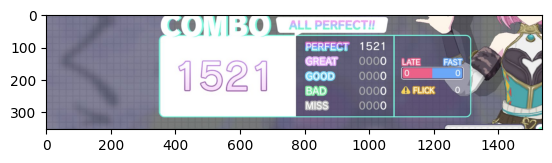

In [39]:
full_img = cv2.imread('../targets/fastlate.png')
full_img = cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB)

full_img = full_img[
  full_img.shape[0] // 2 : full_img.shape[0] // 8 * 7,
  0 : full_img.shape[1] // 4 * 3
]

plt.imshow(full_img)

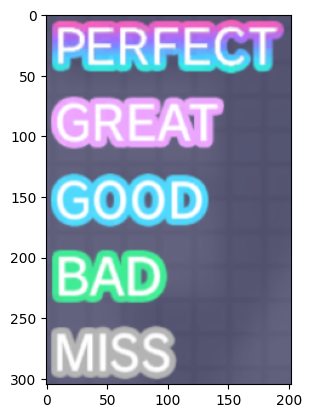

In [40]:
face_img = cv2.imread('./img2.png')
face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

face_img = cv2.resize(face_img, None, None, 0.75, 0.75)

plt.imshow(face_img)

In [41]:
search_target_ratio = get_ratio(search_content=face_img, search_target=full_img)['search_target']

search_target_ratio

1.362597131990931

In [42]:
full_img = cv2.resize(full_img, None, None, search_target_ratio, search_target_ratio)

In [43]:
height, width,channels = face_img.shape

In [7]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

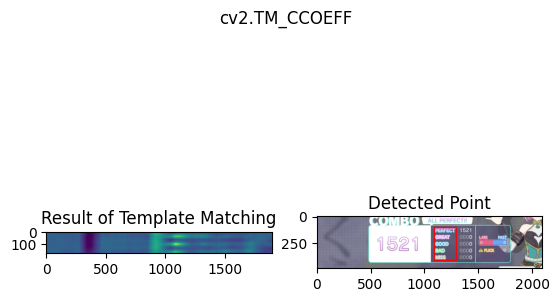

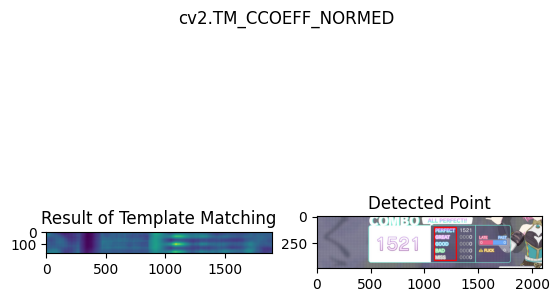

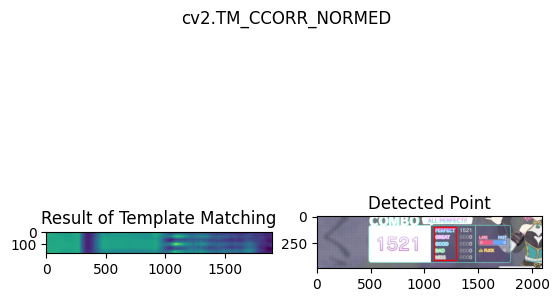

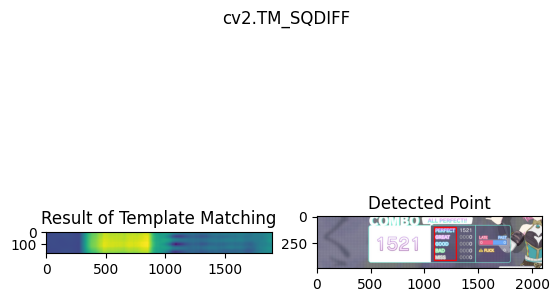

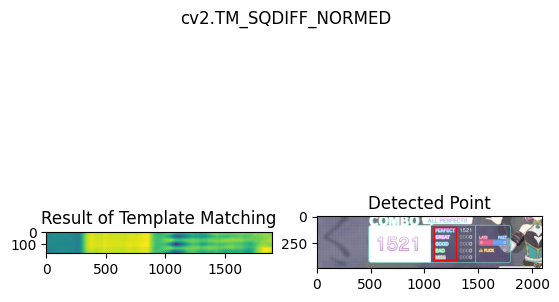

In [44]:
for m in methods:
    
    full_copy = full_img.copy()
    
    method = eval(m)

    res = cv2.matchTemplate(full_copy,face_img,method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    bottom_right = (top_left[0] + width, top_left[1] + height)

    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')

    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')